In [95]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('d:/data/new_data/Dataset/Dataset/data3/google_cleaned.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


#### Separate lists of numeric and categorical columns


In [97]:
num_features = [cols for cols in data.columns if data[cols].dtype != 'O']
cat_features = [cols for cols in data.columns if data[cols].dtype == 'O']

print('Data has {} numerical columns: {}'.format(len(num_features),num_features))
print('Data has {} catagorical columns: {}'.format(len(cat_features),cat_features))

Data has 8 numerical columns: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
Data has 8 catagorical columns: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


#### Univariate Analysis:
This analysis is done for considering single variable and is the simplest form of analysis. 
##### Numarical Variable:

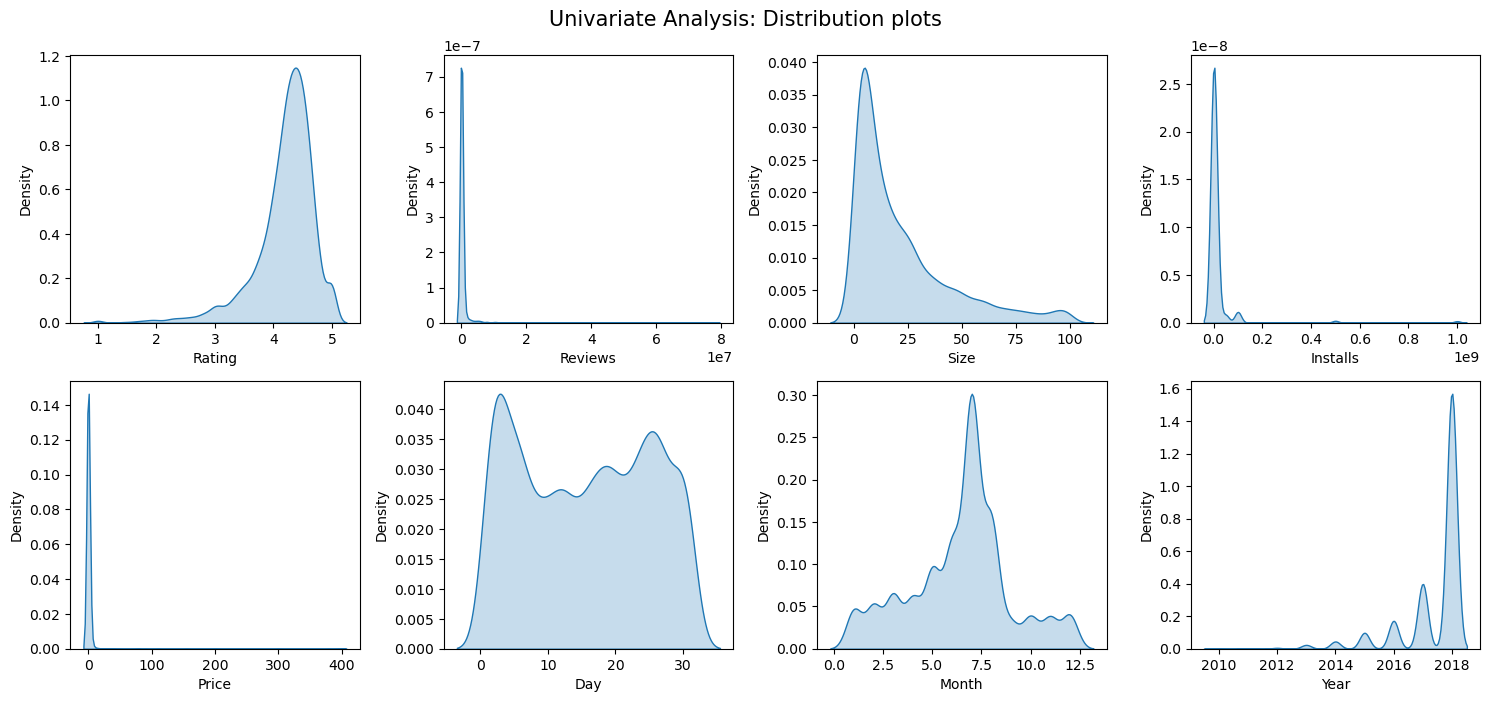

In [98]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis: Distribution plots',fontsize=15)
for i in range(0,len(num_features)):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x = data[num_features[i]],fill=True)
    plt.xlabel(num_features[i])
    plt.tight_layout()

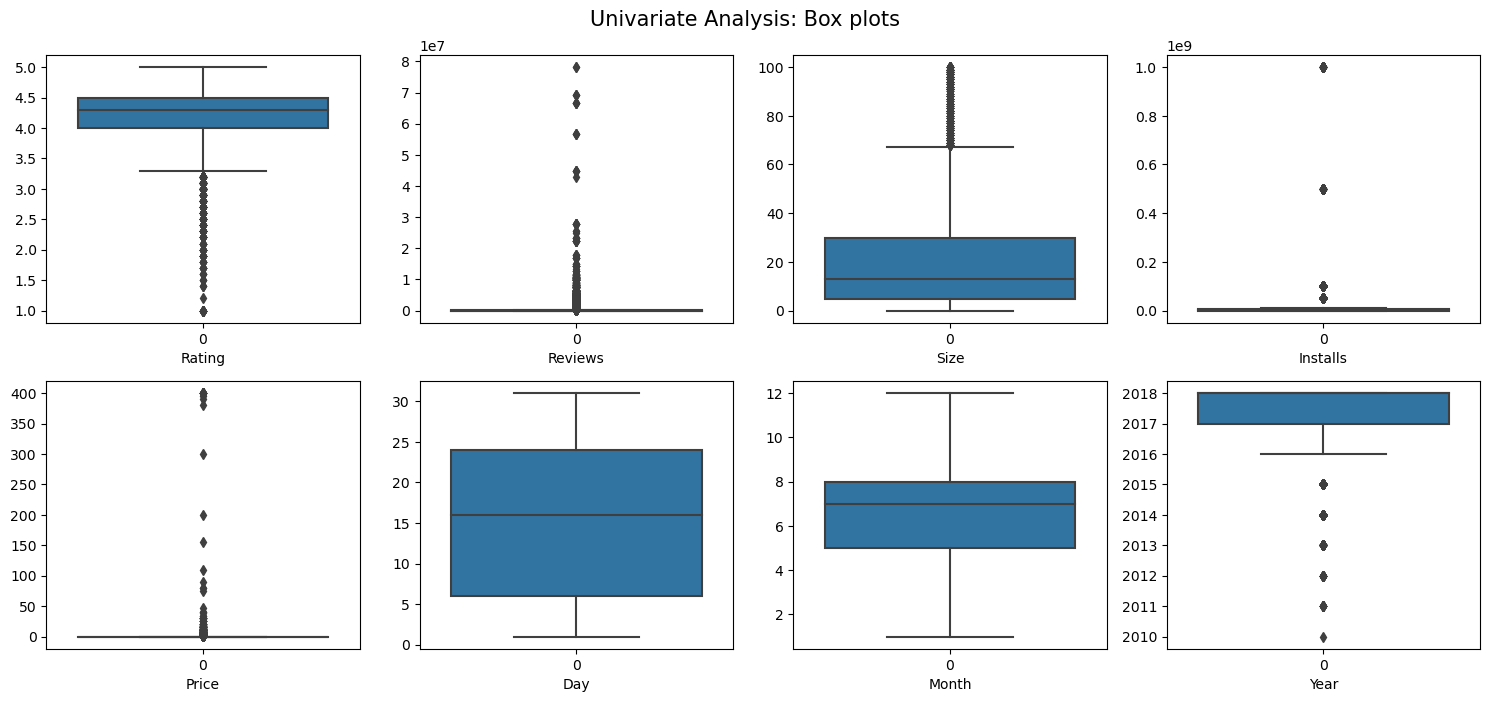

In [99]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis: Box plots',fontsize=15)
for i in range(0,len(num_features)):
    plt.subplot(3,4,i+1)
    sns.boxplot(data[num_features[i]])
    plt.xlabel(num_features[i])
    plt.tight_layout()

Conclusions from charts above:
- Ratings and Year of updates are left skewed. While, Reviews, Size, Installs, Price are right skewed(log normal distribution)
- Rating, Reviews, Size, Installs, Price are the columns with outliers.
- Most of the applications are updated between June to August months.
- Number of applications updated per year increases with time and in the year 2018, highest number of applications are updated.
- Majority of the applications are either free or cost very less.

##### Categorical Variable:

In [100]:
cat_features = [ele for ele in cat_features if ele not in ['App','Last Updated','Current Ver']]

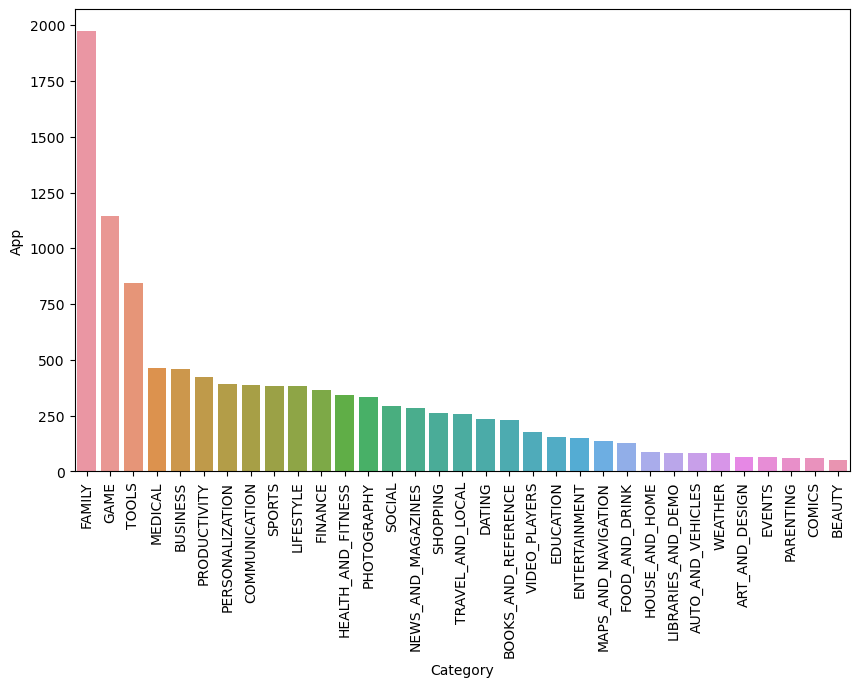

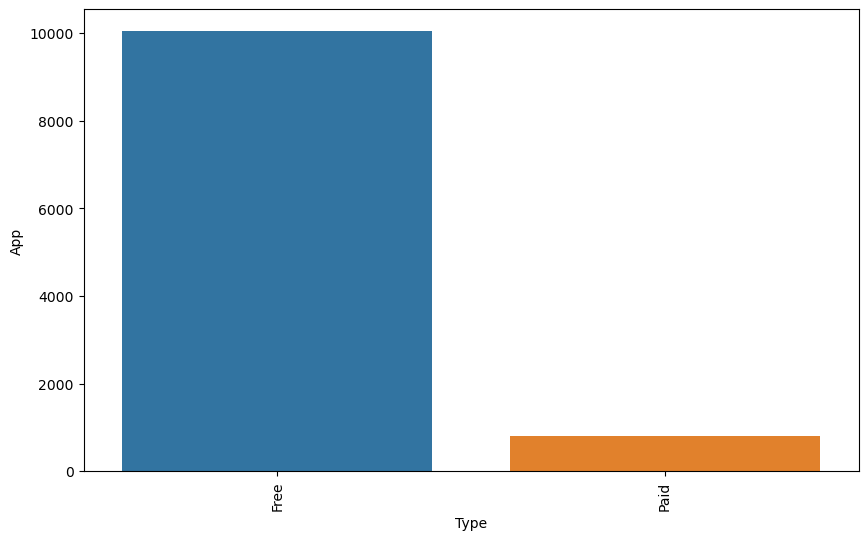

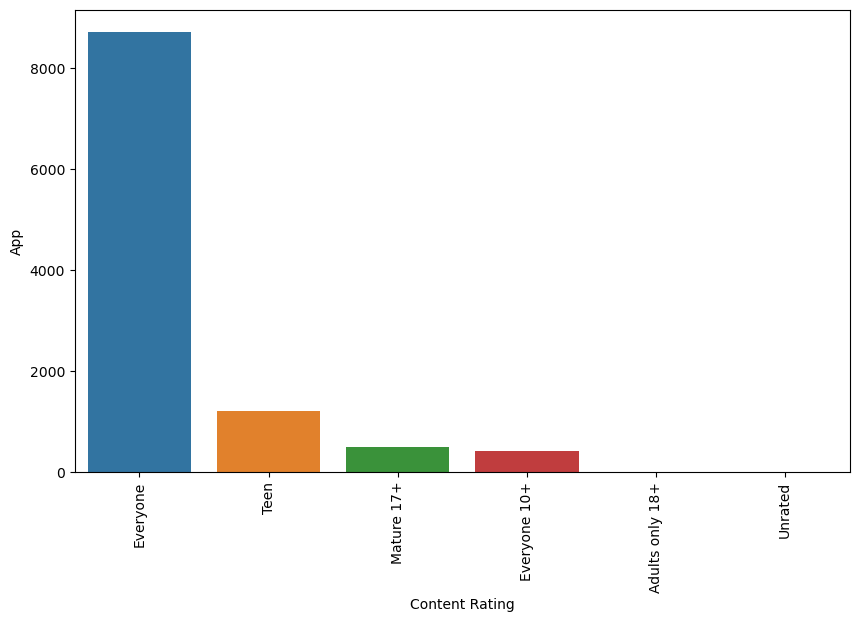

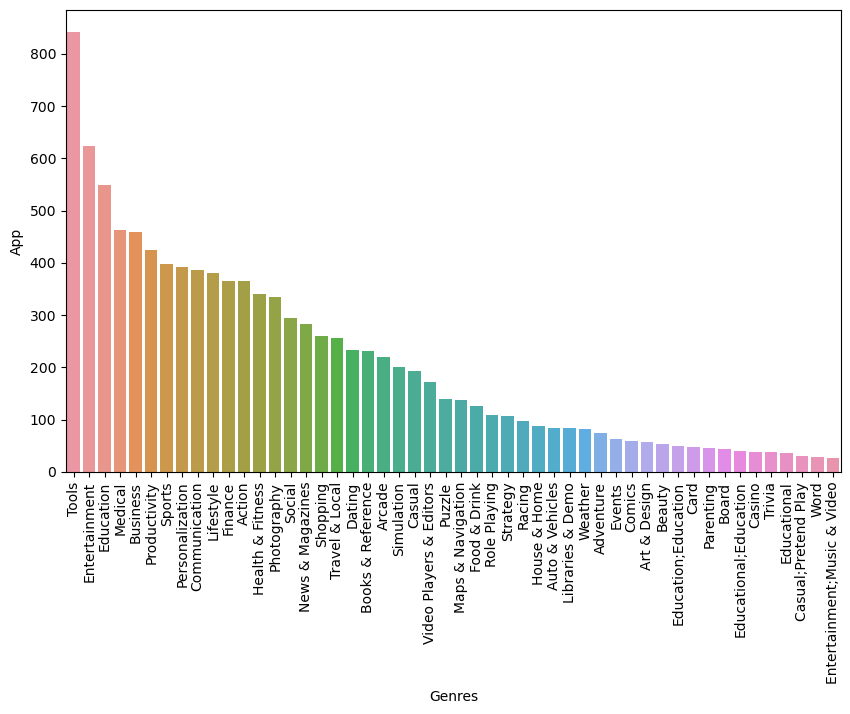

In [101]:
# plt.suptitle('Univariate Analysis:Count plot',fontsize=15)
for i in range(0,len(cat_features)-1):
    data_cat = data.groupby(cat_features[i]).App.count().reset_index().sort_values(by='App',ascending=False)
    # data_cat.head(50).plot.bar(color = 'teal',x=cat_features[i])
    plt.figure(figsize=(10,6))
    sns.barplot(data_cat.head(50),x=cat_features[i],y='App')
    plt.xlabel(cat_features[i])
    plt.xticks(rotation=90)
    plt.show()


- Here, I have just considered top 50 Genres in the plot. All the graph shows number of applications per each categorical feature.
- Family and Games are among the top categories of applications.
- Compared to paid, number of free applications are very high.
- Tools, Entertainment and Education are among the top genres.

#### Multivariant Analysis:

In [102]:
data[(list(data.columns)[1:])].corr()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.068141,0.083950,0.051355,-0.021903,-0.012508,0.017254,0.137714
Reviews,0.068141,1.000000,0.238201,0.643122,-0.009667,-0.030141,0.045930,0.075537
Size,0.083950,0.238201,1.000000,0.164798,-0.022968,-0.009509,0.039429,0.215398
Installs,0.051355,0.643122,0.164798,1.000000,-0.011689,-0.053122,0.056447,0.089368
Price,-0.021903,-0.009667,-0.022968,-0.011689,1.000000,-0.008225,0.006943,-0.007897
Day,-0.012508,-0.030141,-0.009509,-0.053122,-0.008225,1.000000,-0.079856,-0.016433
Month,0.017254,0.045930,0.039429,0.056447,0.006943,-0.079856,1.000000,-0.187306
Year,0.137714,0.075537,0.215398,0.089368,-0.007897,-0.016433,-0.187306,1.000000


<AxesSubplot:>

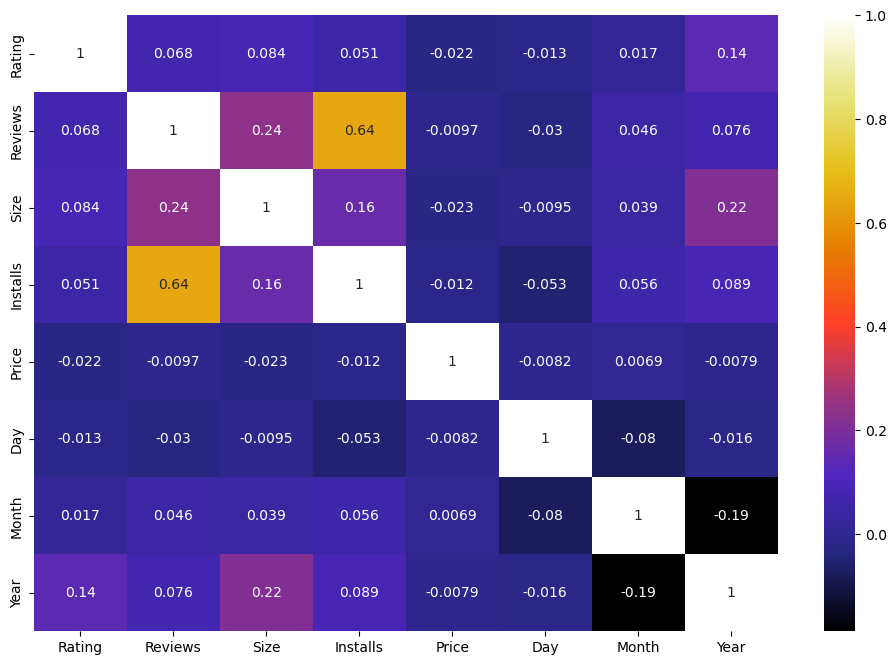

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)

- It is clearly visible here that number of installs and number of reviews are highly correlated.

#### Remove null values in Rating and Size column:
- To remove null values form Rating column, I have defined a new dataframe containing mean rating value for each available category of App. Using this dataframe, null values will be replaced according to the category of respective App. This can be call replacing null values conditionally. 
- As all the Application with size mentioned has size > 0, we can easily differentiate Apps with size 0 are the Apps for which sizes are not defined.

In [104]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [105]:
rating_df = data.groupby('Category').Rating.mean().reset_index()
rating_df.head()

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452


In [106]:
data = pd.merge(data,rating_df,on='Category',how='left')

In [107]:
data.Rating_x.fillna(data.Rating_y,inplace=True)
data.rename(columns={'Rating_x':'Rating'},inplace=True)
data.drop(columns='Rating_y',inplace=True)
data.Size.fillna(0,inplace=True)
data.dropna(inplace=True)

In [108]:
data.isna().sum().sum()

0